In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Monthly effective precipitation distribution for selected basins

In [5]:
# loading data
df_month = pd.read_csv('../../Data_main/results_eval/peff/monthly/all_basins.csv')

# renaming Republican river basin
df_month = df_month.replace(to_replace='Republican Basin, CO', value='Republican River Basin, CO')

In [6]:
basin_names = ['GMD4, KS', 'GMD3, KS', 'Republican River Basin, CO',
               'Harquahala INA, AZ', 'Douglas AMA, AZ',
               'Diamond Valley, NV', 'Central Valley, CA']

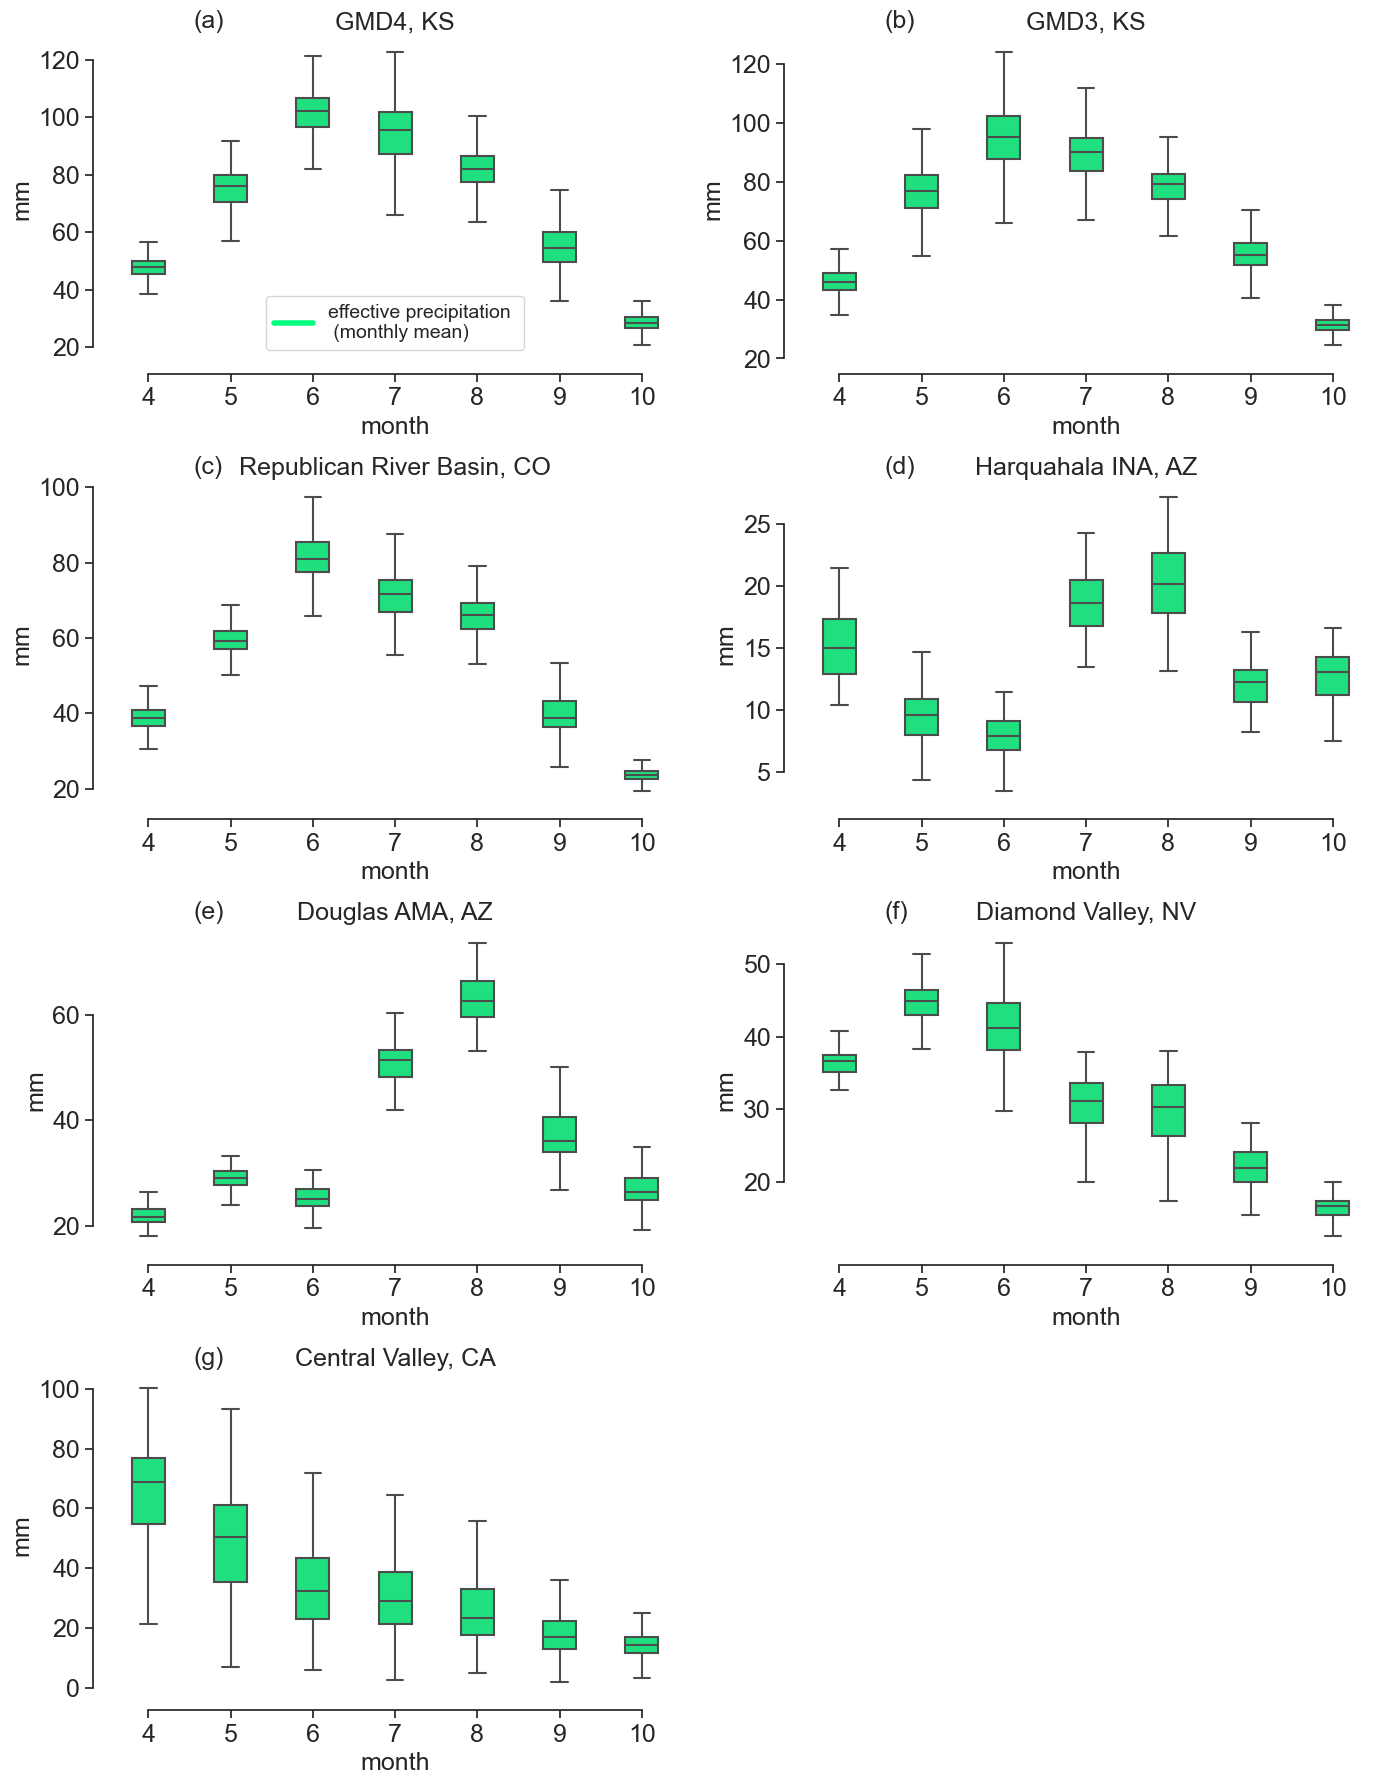

In [7]:
# plotting
col = 2
row = 4
fig, ax = plt.subplots(row, col, figsize=(14, 18))

# setting some properties for the plot
plt.rcParams['font.size'] = '18'
sns.set_theme(style="ticks", palette="pastel")

# Subplot labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']

# plotting
basin_idx = 0 # starting an index to loop for each subplot

for r in range(row):
    for c in range(col):
        if (r==3) & (c==1):  # last subplot off
            ax[r, c].axis('off')
        
        else:  # for monthly peff plot of each basin
            df_plot = df_month[df_month['basin_name'] == basin_names[basin_idx]]
            
            sns.boxplot(x=df_plot['month'], y=df_plot['peff'], 
                        ax=ax[r, c], color='springgreen', width=0.4, showfliers=False)
            
            ax[r, c].set_title(basin_names[basin_idx], fontsize=18)
            ax[r, c].set_xlabel('month', fontsize=18)
            ax[r, c].set_ylabel('mm', fontsize=18)
            ax[r, c].tick_params(axis='both', labelsize=18)
            #ax[r, c].set_ylim([0, 130])

            # add subplot serial
            ax[r, c].text(0.15, 1.085, subplot_labels[basin_idx], transform=ax[r, c].transAxes, 
                          fontsize=18, va='top', ha='left')

            basin_idx += 1

            # legend
            if (r==0) & (c==0):
                handles = [plt.Line2D([0], [0], color='springgreen', lw=4)]
                labels = ['effective precipitation \n (monthly mean)']
                ax[r, c].legend(handles, labels, fontsize=14, loc='lower center')

# removing the boxes around the plot and only keeping the x and y axis
sns.despine(offset=10, trim=True)  

# Rotate x labels for plot 1 after tight layout
for label in ax[3, 1].get_xticklabels():
    label.set_rotation(90)
    
# Adjust bottom margin to prevent cutoff
plt.subplots_adjust(bottom=0.1)
plt.tight_layout()

fig.savefig('plots/peff_boxplot.png', dpi=300)

# Monthly precipitation vs effective precipitation for selected basins

In [9]:
# loading monthly precip data
precip = pd.read_csv('../../Data_main/results_eval/precip/monthly/all_basins_mv_avg.csv')

# melting the dataframe
precip_melt = precip.melt(id_vars=['basin_name', 'month'], value_vars=['mean_precip_4_mnth', 'mean_precip_3_mnth', 'mean_precip_2_mnth', 'mean_precip'], 
                          var_name='variable', value_name='value')
precip_melt.head()

,basin_name,month,variable,value
0,"GMD4, KS",4,mean_precip_4_mnth,25.884655
1,"GMD4, KS",4,mean_precip_4_mnth,25.884655
2,"GMD4, KS",4,mean_precip_4_mnth,25.719940
3,"GMD4, KS",4,mean_precip_4_mnth,25.719940
4,"GMD4, KS",4,mean_precip_4_mnth,25.614714


In [11]:
# loading monthly effective precip data
df_month = pd.read_csv('../../Data_main/results_eval/peff/monthly/all_basins.csv')
df_month_melt = df_month.melt(id_vars=['basin_name', 'month'], value_vars=['peff'], 
                          var_name='variable', value_name='value')
df_month_melt.head()

,basin_name,month,variable,value
0,"GMD4, KS",4,peff,36.942654
1,"GMD4, KS",5,peff,63.892242
2,"GMD4, KS",6,peff,90.785790
3,"GMD4, KS",7,peff,83.947876
4,"GMD4, KS",8,peff,70.640080


In [12]:
# joining melted monthly precipitation and effective precipitation dataframe
df_merge = pd.concat([precip_melt, df_month_melt], axis=0)

# renaming Republican river basin
df_merge = df_merge.replace(to_replace='Republican Basin, CO', value='Republican River Basin, CO')

df_merge

,basin_name,month,variable,value
0,"GMD4, KS",4,mean_precip_4_mnth,25.884655
1,"GMD4, KS",4,mean_precip_4_mnth,25.884655
2,"GMD4, KS",4,mean_precip_4_mnth,25.719940
3,"GMD4, KS",4,mean_precip_4_mnth,25.719940
4,"GMD4, KS",4,mean_precip_4_mnth,25.614714
...,...,...,...,...
162472,"Central Valley, CA",6,peff,15.634990
162473,"Central Valley, CA",7,peff,11.884118
162474,"Central Valley, CA",8,peff,12.836529
162475,"Central Valley, CA",9,peff,11.277027


In [13]:
# loading growing season peff and water year precipitation data
df_GS = pd.read_csv('../../Data_main/results_eval/peff/grow_season/all_basins.csv')

# melting the dataframes so that effective precip and precip are in the same column
df_GS_melt = df_GS.melt(id_vars='basin_name', value_vars=['peff', 'precip'], var_name='variable', value_name='value')

# renaming Republican river basin
df_GS_melt = df_GS_melt.replace(to_replace='Republican Basin, CO', value='Republican River Basin, CO')
df_GS_melt

,basin_name,variable,value
0,"GMD4, KS",peff,415.59277
1,"GMD4, KS",peff,443.31525
2,"GMD4, KS",peff,434.54904
3,"GMD4, KS",peff,434.80756
4,"GMD4, KS",peff,458.42798
...,...,...,...
46417,"Central Valley, CA",precip,214.30066
46418,"Central Valley, CA",precip,232.67720
46419,"Central Valley, CA",precip,232.67720
46420,"Central Valley, CA",precip,231.17424


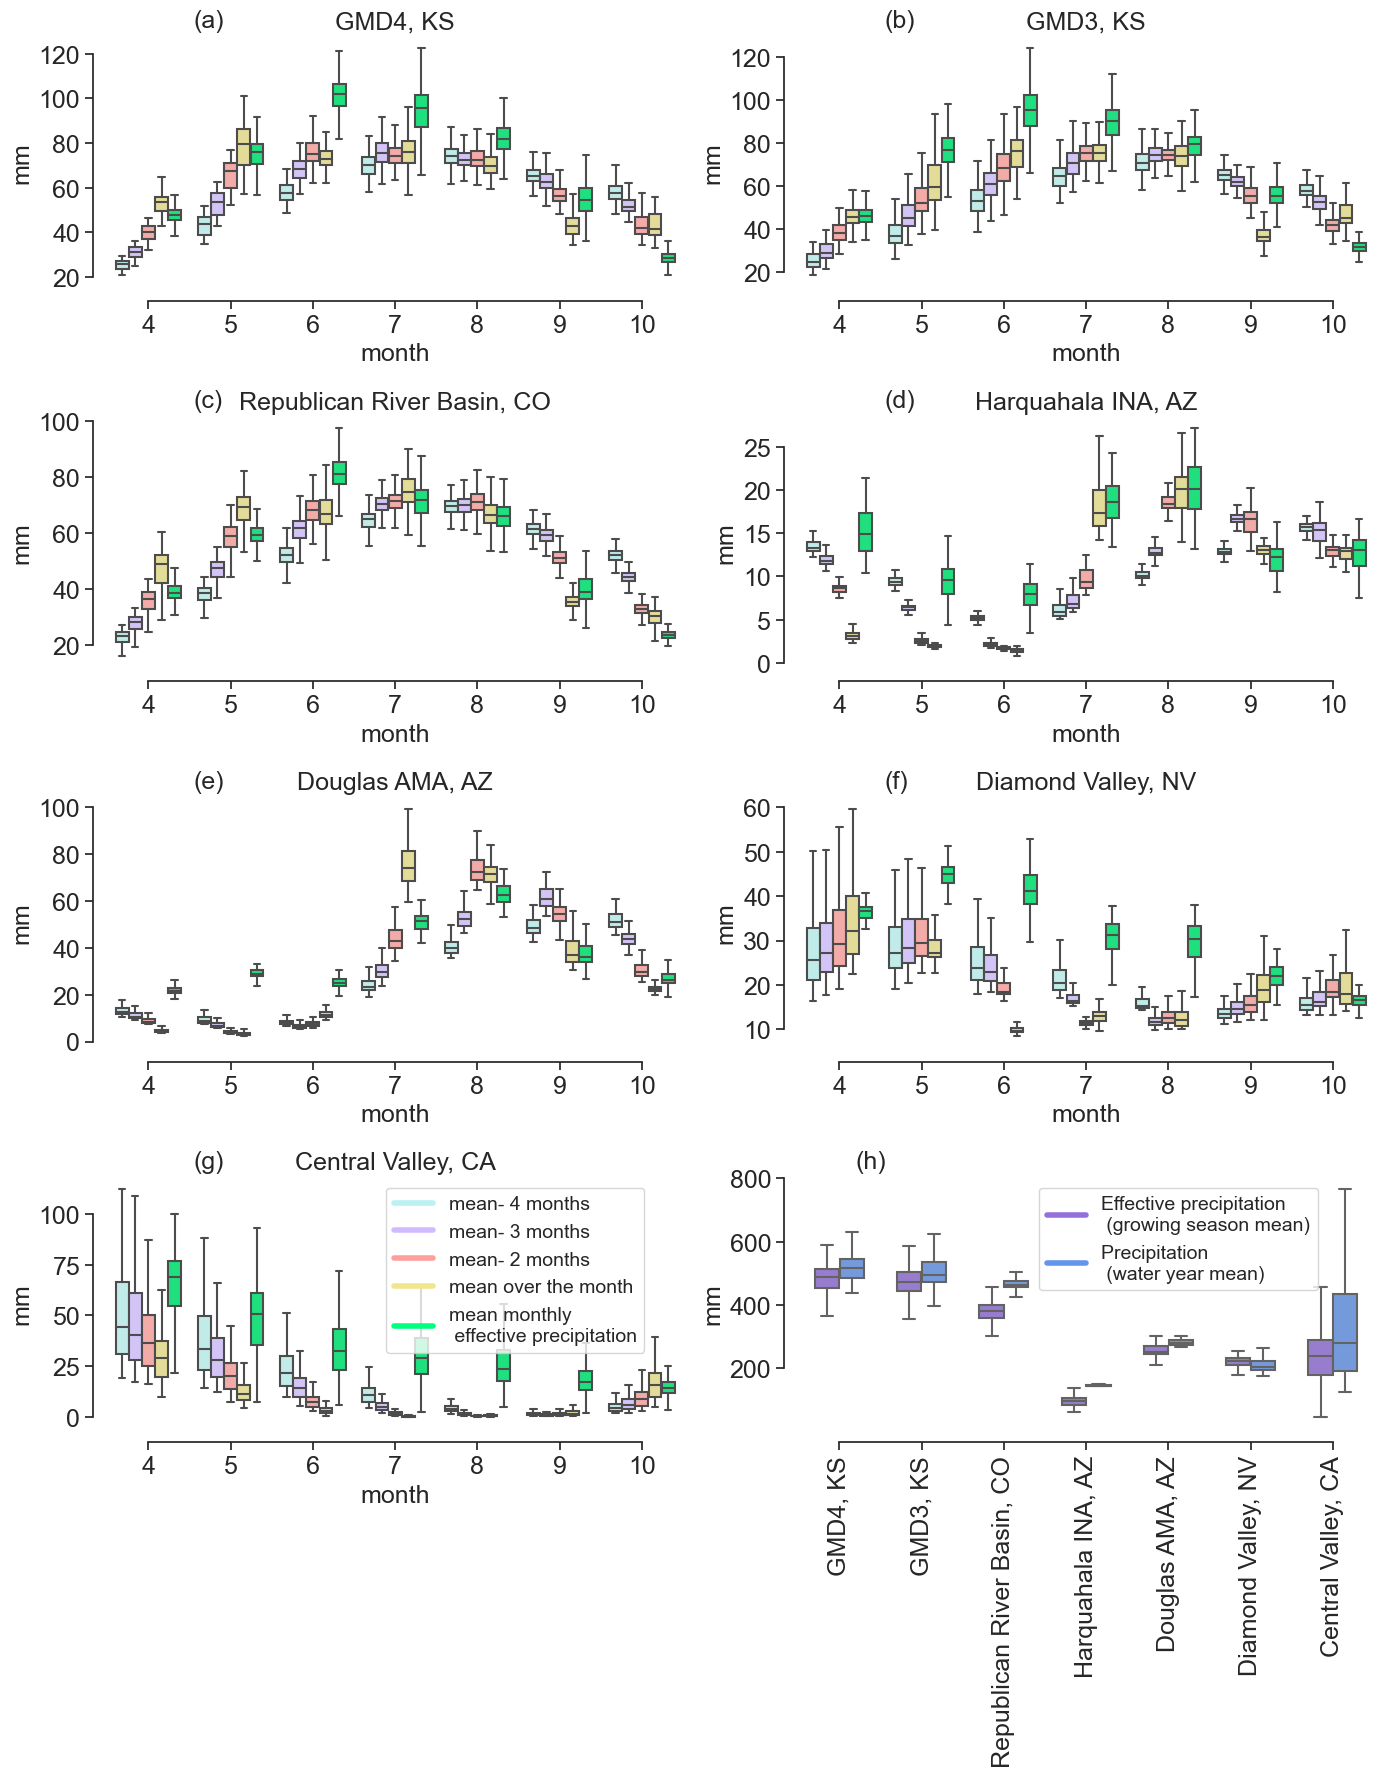

In [14]:
# plotting
col = 2
row = 4
fig, ax = plt.subplots(row, col, figsize=(14, 18))

# setting some properties for the plot
plt.rcParams['font.size'] = '18'
sns.set_theme(style="ticks", palette="pastel")

# Subplot labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']

# plotting
basin_idx = 0 # starting an index to loop for each subplot

for r in range(row):
    for c in range(col):  
        if (r==3) & (c==1):  # for peff and precip growing season group plot 
            # color and basin order
            colors = {'peff': 'mediumpurple', 'precip': 'cornflowerblue'}
            basin_order = ['GMD4, KS', 'GMD3, KS', 'Republican River Basin, CO',
                           'Harquahala INA, AZ', 'Douglas AMA, AZ',
                           'Diamond Valley, NV', 'Central Valley, CA']
            
            sns.boxplot(x=df_GS_melt['basin_name'], y=df_GS_melt['value'], hue=df_GS_melt['variable'], 
                        ax=ax[r, c], order=basin_order, palette=colors, width=0.6, showfliers=False)
            
            ax[r, c].set_xlabel(None)
            ax[r, c].set_ylabel('mm', fontsize=18)
            ax[r, c].set_xticklabels(basin_order, rotation=90)
            ax[r, c].tick_params(axis='both', labelsize=18)
            ax[r, c].text(0.1, 1.11, subplot_labels[-1], transform=ax[r, c].transAxes, 
                          fontsize=18, va='top', ha='left')
            
            # legend
            handles = [plt.Line2D([0], [0], color='mediumpurple', lw=4),
                       plt.Line2D([0], [0], color='cornflowerblue', lw=4)]
            labels = ['Effective precipitation \n (growing season mean)', 'Precipitation \n (water year mean)']
            ax[r, c].legend(handles, labels, fontsize=14, loc='upper right', bbox_to_anchor=(0.92, 1))
            
        else:  # for monthly moving average precip plot of each basin
            df_plot = df_merge[df_merge['basin_name'] == basin_names[basin_idx]]

            colors = {'mean_precip_4_mnth': 'c', 'mean_precip_3_mnth': 'm', 'mean_precip_2_mnth': 'r', 
                      'mean_precip': 'khaki', 'peff': 'springgreen'}
            
            sns.boxplot(x=df_plot['month'], y=df_plot['value'], hue=df_plot['variable'],
                        ax=ax[r, c], palette=colors, width=0.8, showfliers=False)
            
            ax[r, c].set_title(basin_names[basin_idx], fontsize=18)
            ax[r, c].set_xlabel('month', fontsize=18)
            ax[r, c].set_ylabel('mm', fontsize=18)
            ax[r, c].tick_params(axis='both', labelsize=18)
            ax[r, c].get_legend().set_visible(False)
            #ax[r, c].set_ylim([0, 130])

            # add subplot serial
            ax[r, c].text(0.15, 1.11, subplot_labels[basin_idx], transform=ax[r, c].transAxes, 
                          fontsize=18, va='top', ha='left')

            basin_idx += 1

            # custom legend
            if (r==3) & (c==0):
                handles = [plt.Line2D([0], [0], color='c', lw=4),
                           plt.Line2D([0], [0], color='m', lw=4),
                           plt.Line2D([0], [0], color='r', lw=4),
                           plt.Line2D([0], [0], color='khaki', lw=4),
                           plt.Line2D([0], [0], color='springgreen', lw=4)]
                labels = ['mean- 4 months', 'mean- 3 months', 'mean- 2 months', 'mean over the month', 'mean monthly \n effective precipitation']
                ax[r, c].legend(handles, labels, fontsize=14, loc='upper right', bbox_to_anchor=(0.95, 1))

# removing the boxes around the plot and only keeping the x and y axis
sns.despine(offset=10, trim=True)  

# Rotate x labels for plot 8 after tight layout
for label in ax[3, 1].get_xticklabels():
    label.set_rotation(90)

# Adjust bottom margin to prevent cutoff
plt.subplots_adjust(bottom=0.1)
plt.tight_layout()

fig.savefig('plots/monthly_precip_boxplot.png', dpi=300)